In [1]:
import torch
import torch.nn
import argoverse
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
import torch
import os, shutil
import numpy as np
import glob

In [14]:
with open("/home/liangzx/Datasets/kitti/object/splits/train.txt") as f:
    ids = np.loadtxt(f).astype(np.int16)

In [15]:
for i in ids:
    index = "%06d" % i
    pcd_path = "./datasets/roi_result/left/" + index
    shutil.move(pcd_path, "./datasets/roi_result/left/train/")

In [6]:
a = a.transpose(1,2)

In [12]:
b = torch.mean(a, dim=2, keepdim=True)

In [15]:
c = a - b

In [16]:
c.shape

torch.Size([5, 3, 3000])

In [25]:
def read_pcd(pcd_path):
    lines = []
    num_points = None

    with open(pcd_path, 'r') as f:
        for line in f:
            lines.append(line.strip())
            if line.startswith('POINTS'):
                num_points = int(line.split()[-1])
    assert num_points is not None

    points = []
    for line in lines[-num_points:]:
        x, y, z = list(map(float, line.split()))
        points.append(np.array([x, y, z]))
    return np.array(points)  # N * 3

def load_pcd_to_ndarray(pcd_path):
    with open(pcd_path) as f:
        while True:
            ln = f.readline().strip()
            if ln.startswith('DATA'):
                break

        points = np.loadtxt(f)
        points = points[:, 0:3]
        return points

In [26]:
HEADER = '''\
# .PCD v0.7 - Point Cloud Data file format
VERSION 0.7
FIELDS x y z
SIZE 4 4 4 
TYPE F F F 
COUNT 1 1 1 
WIDTH {}
HEIGHT 1
VIEWPOINT 0 0 0 1 0 0 0
POINTS {}
DATA ascii
'''

def write_pcd(points, save_pcd_path):
    n = len(points)
    lines = []
    for i in range(n):
        x, y, z= points[i]
        lines.append('{:.6f} {:.6f} {:.6f}'.format(x, y, z))
    with open(save_pcd_path, 'w') as f:
        f.write(HEADER.format(n, n))
        f.write('\n'.join(lines))

def write_pcd_from_ndarray(points, save_pcd_path):
    with open(save_pcd_path, 'w') as f:
        f.write(HEADER.format(len(points), len(points)) + '\n')
        np.savetxt(f, points, delimiter = ' ', fmt = '%f %f %f')

In [2]:
from argoverse.map_representation.map_api import ArgoverseMap
am = ArgoverseMap()

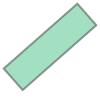

In [5]:
from shapely.geometry.polygon import Polygon
display(Polygon(am.find_local_lane_polygons([3167-20,3167+20,1673-20,1673+20], 'PIT')[0]))

In [ ]:
tracking_dataset_dir = "/home/liangzx/Datasets/Argoverse/forecasting_sample/data/"
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader

log_index = 2645
frame_index = 100
idx = 100
argoverse_loader = ArgoverseTrackingLoader(tracking_dataset_dir)
log_id = argoverse_loader.log_list[log_index]
argoverse_data = argoverse_loader[log_index]
city_name = argoverse_data.city_name

lidar_pts = argoverse_data.get_lidar(idx)

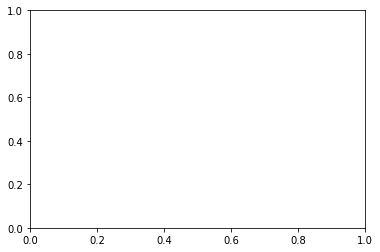

In [12]:
ax = plt.subplot(1,1,1)
am.plot_nearby_halluc_lanes(ax, 'PIT', 3167, 1673, patch_color='r', radius=20)